## Teoría cuántica básica, Observables y Medidas  
La mecánica cuántica es la teoría física que describe el comportamiento de los sistemas a escala microscópica. A diferencia de la mecánica clásica, en la mecánica cuántica los sistemas no tienen valores definidos para sus propiedades hasta que son medidos.

# Simule el primer sistema cuántico descrito en la sección 4.1
El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

Simula una partícula cuántica confinada a posiciones discretas en una línea. El sistema calcula:
- Probabilidad de encontrar la partícula en cada posición
- Genera visualización de la distribución de probabilidades



Probabilidad en posición 2: 0.3333

Probabilidades en todas las posiciones:
Posición 0: 0.3333
Posición 1: 0.0000
Posición 2: 0.3333
Posición 3: 0.3333


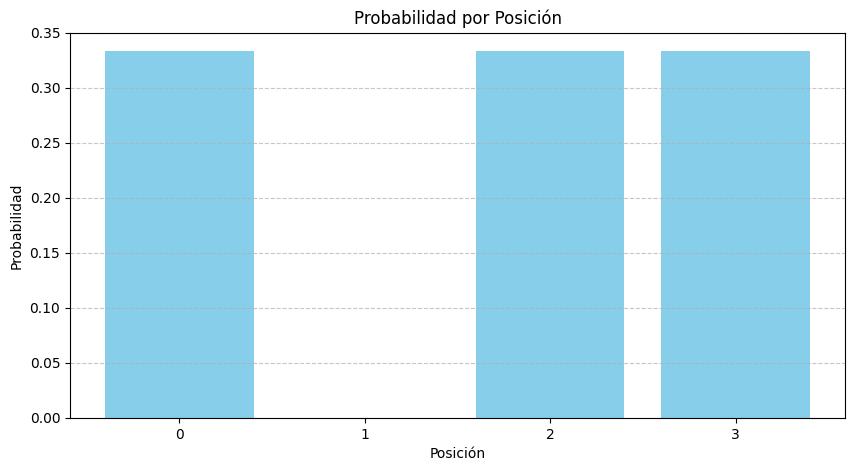

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simular_sistema_cuantico(num_posiciones, estado_ket):
    
    norma = np.linalg.norm(estado_ket)
    if norma == 0:
        raise ValueError("El vector ket no puede ser cero")
    estado_normalizado = estado_ket / norma
    
    # Calcular probabilidades
    probabilidades = np.abs(estado_normalizado)**2
    
    def calcular_probabilidad(pos):

        if pos < 0 or pos >= num_posiciones:
            raise ValueError(f"Posición debe estar entre 0 y {num_posiciones-1}")
        return probabilidades[pos]
    
    def mostrar_grafico():
    
        plt.figure(figsize=(10, 5))
        plt.bar(range(num_posiciones), probabilidades, color='skyblue')
        plt.xlabel('Posición')
        plt.ylabel('Probabilidad')
        plt.title('Probabilidad por Posición')
        plt.xticks(range(num_posiciones))
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    
    return {
        'probabilidades': probabilidades,
        'probabilidad_posicion': calcular_probabilidad,
        'visualizar': mostrar_grafico
    }


if __name__ == "__main__":
  
    num_pos = 4
    ket = np.array([1, 0, 1, 1], dtype=complex)  
    
   
    sistema = simular_sistema_cuantico(num_pos, ket)
    

    prob_pos2 = sistema['probabilidad_posicion'](2)
    print(f"Probabilidad en posición 2: {prob_pos2:.4f}")
    
   
    print("\nProbabilidades en todas las posiciones:")
    for i, prob in enumerate(sistema['probabilidades']):
        print(f"Posición {i}: {prob:.4f}")
    

    sistema['visualizar']()

---

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

### 1. **Amplitud de Transición**
La probabilidad de transición entre dos estados cuánticos se calcula mediante:

```math
P(|\psi\rangle \rightarrow |\phi\rangle) = |\langle \phi | \psi \rangle|^2

\|\psi\| = \sqrt{\langle \psi | \psi \rangle} = 1

In [ ]:
import numpy as np

def probabilidad_transicion(ket_inicial, ket_final):

    # Normalizar ambos estados
    def normalizar(ket):
        norma = np.linalg.norm(ket)
        if norma == 0:
            raise ValueError("El vector ket no puede ser cero")
        return ket / norma
    
    psi = normalizar(ket_inicial)
    phi = normalizar(ket_final)
    
    
    amplitud = np.vdot(phi, psi) 
    
   
    return np.abs(amplitud)**2

# Ejemplo de uso:
if __name__ == "__main__":
    # Definir estados (pueden ser complejos)
    estado_inicial = np.array([1, 0, 1j, 1])  
    estado_final = np.array([0, 1, 0, 0])     
    
    
    prob = probabilidad_transicion(estado_inicial, estado_final)
    
    print(f"Probabilidad de transición: {prob:.4f}")
    print(f"Porcentaje: {prob*100:.2f}%")

Probabilidad de transición: 0.0000
Porcentaje: 0.00%


----

# Complete los retos de programación del capítulo 4.
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación


In [ ]:
import numpy as np

def probabilidad_transicion(estado_inicial, estado_final):
 
    def normalizar(estado):
        norma = np.linalg.norm(estado)
        return estado / norma if norma != 0 else estado
    
    psi = normalizar(estado_inicial)
    phi = normalizar(estado_final)
    
    amplitud = np.vdot(phi, psi)  # \(\langle \phi | \psi \rangle\)
    
   
    probabilidad = np.abs(amplitud)**2
    return probabilidad


estado_inicial = np.array([1, 1j], dtype=complex)  # \( |\psi\rangle \)
estado_final = np.array([1, 0], dtype=complex)     # \( |\phi\rangle \)


prob = probabilidad_transicion(estado_inicial, estado_final)
print(f"Probabilidad de transición: {prob:.4f}")

Probabilidad de transición: 0.5000


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.


### Para una matriz hermítica $A$ y estado $|\psi\rangle$:  

1. **Media (valor esperado)**:  
   - Promedio cuántico de las mediciones:  
     $$\langle A \rangle = \langle \psi | A | \psi \rangle$$  

2. **Varianza**:  
   - Dispersión de las mediciones:  
     $$\sigma^2 = \langle A^2 \rangle - \langle A \rangle^2$$  

3. **Ejemplo con Pauli-Y**:  
   - Para $|\psi\rangle = |0\rangle + i|1\rangle$:  
     - Media: 0 (simetría)  
     - Varianza: 1 (máxima incertidumbre)  


In [ ]:
import numpy as np

def analizar_observable(A, psi, imprimir=True, graficar=False):

    if not np.allclose(A, A.conj().T):
        raise ValueError("La matriz no es hermítica")
    
    psi_norm = psi / np.linalg.norm(psi)
    media = np.real(psi_norm.conj().T @ A @ psi_norm).item()
    varianza = np.real(psi_norm.conj().T @ A @ A @ psi_norm).item() - media**2
    resultados = {
        'media': media,
        'varianza': varianza,
        'desviacion': np.sqrt(varianza)
    }
    

    if imprimir:
        print("\n=== RESULTADOS ===")
        print(f"Media (⟨A⟩): {resultados['media']:.6f}")
        print(f"Varianza (σ²): {resultados['varianza']:.6f}")
        print(f"Desviación estándar (σ): {resultados['desviacion']:.6f}\n")
    
  
    if graficar:
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.bar(['⟨A⟩', 'σ²'], [resultados['media'], resultados['varianza']], color=['skyblue', 'salmon'])
        ax.set_title('Propiedades del Observable')
        plt.show()
    
    return resultados

if __name__ == "__main__":
    A = np.array([[0, -1j], [1j, 0]], dtype=complex)
    psi = np.array([1, 1], dtype=complex)
    
    resultados = analizar_observable(A, psi, graficar=False)


=== RESULTADOS ===
Media (⟨A⟩): 0.000000
Varianza (σ²): 1.000000
Desviación estándar (σ): 1.000000



--------------------------------------------------------------------------------------------------------------------------

3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.
#  Evolución Cuántica y Medición del Sistema

Se analiza la evolución de un sistema cuántico aplicando una observación mediante un operador hermítico \( O \). Se determinan los valores propios del observable y la probabilidad de que el sistema transite a alguno de los estados propios tras la medición.

##  Pasos de la solución

### 1 **Definir el observable \( O \)**
   - \( O \) es una **matriz hermítica** que representa un operador observable en mecánica cuántica.

### 2️ **Calcular los valores propios \( \lambda_i \)**
   - Se resuelve la ecuación característica:  
     $$ \det(O - \lambda I) = 0 $$
   - Los **autovalores** \( \lambda_i \) representan los posibles resultados al medir el sistema.

### 3️ **Determinar los vectores propios \( v_i \)**
   - Los **autovectores** asociados forman una base ortonormal:  
     $$ O v_i = \lambda_i v_i $$

### 4️ **Calcular la probabilidad de transición**


In [35]:

import numpy as np

O = np.array([
    [3, 1, 0, 0],
    [1, 2, 1, 0],
    [0, 1, 2, 1],
    [0, 0, 1, 3]
], dtype=complex)

psi_0 = np.array([1, 0, 0, 0], dtype=complex)


eigenvalues, eigenvectors = np.linalg.eigh(O)


probabilities = np.abs(eigenvectors.T.conj() @ psi_0) ** 2

eigenvalues, eigenvectors, probabilities


(array([0.58578644, 2.        , 3.41421356, 4.        ]),
 array([[ 0.27059805-0.j,  0.5       +0.j,  0.65328148+0.j,
         -0.5       +0.j],
        [-0.65328148+0.j, -0.5       +0.j,  0.27059805+0.j,
         -0.5       +0.j],
        [ 0.65328148-0.j, -0.5       +0.j, -0.27059805+0.j,
         -0.5       +0.j],
        [-0.27059805+0.j,  0.5       +0.j, -0.65328148+0.j,
         -0.5       +0.j]]),
 array([0.0732233, 0.25     , 0.4267767, 0.25     ]))

---------------------------------------------------------------------------------------------------------------------------

4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

# **Evolución Cuántica con Matrices Unitarias**

## **Descripción del problema**
Se analiza la evolución de un sistema cuántico aplicando una transformación unitaria \( U \) a un estado inicial \( \psi_0 \). Luego de tres pasos, se determina la probabilidad de encontrar el sistema en una posición específica.

## **Pasos de la solución**
1. **Definir la matriz unitaria \( U \)**  
   Representa la evolución del sistema en cada paso de tiempo.
   
2. **Establecer el estado inicial \( \psi_0 \)**  


3. **Aplicar \( U \) tres veces al estado inicial**  
 
   
4. **Obtener la probabilidad de estar en la posición 3**  
   La probabilidad de encontrar la bola en la posición \( 3 \) (índice \( 2 \) en Python) es:  
   


In [ ]:
import numpy as np

U1 = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])

U2 = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, -1, 0, 0],
    [0, 0, 0, -1]
])

U3 = np.array([
    [0, -1j, 0, 0],
    [1j, 0, 0, 0],
    [0, 0, 0, -1],
    [0, 0, 1, 0]
])


psi_0 = np.array([1, 0, 0, 0], dtype=complex)


psi_final = U3 @ U2 @ U1 @ psi_0


print("Estado final del sistema:")
print(psi_final)


Estado final del sistema:
[0.-0.70710678j 0.+0.j         0.+0.j         0.-0.70710678j]


---------------------------------------------------------------------------------------------------------------------------

# Realice los siguientes problemas e incluyalos como ejemplos
4.3.1 Encuentre todos los estados posibles a los que puede pasar el sistema descrito en el Ejercicio 4.2.2 después de realizar una medición.

### 1. Operador $S_x$ y sus autovectores
El operador de spin en dirección x está dado por:
$$
S_x = \frac{\hbar}{2}\begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix}
$$

**Autovectores (estados propios)**:
- $|\rightarrow\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 1\end{bmatrix}$ (valor propio $+\hbar/2$)
- $|\leftarrow\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix}1 \\ -1\end{bmatrix}$ (valor propio $-\hbar/2$)

### 2. Postulados cuánticos aplicados
- **Postulado de medición**: Al medir un observable ($S_x$), el sistema colapsa a uno de sus autovectores.
- **Probabilidad de transición**: $P = |\langle e|\psi\rangle|^2$ (Regla de Born)


In [ ]:
import numpy as np

spin_up = np.array([1, 0], dtype=complex)
spin_right = np.array([1/np.sqrt(2), 1/np.sqrt(2)], dtype=complex)
spin_left = np.array([1/np.sqrt(2), -1/np.sqrt(2)], dtype=complex)


prob_right = np.abs(np.vdot(spin_right, spin_up))**2  # |⟨→|↑⟩|²
prob_left = np.abs(np.vdot(spin_left, spin_up))**2    # |⟨←|↑⟩|²

print(f"Probabilidad de colapsar a |→⟩: {prob_right:.2f}")
print(f"Probabilidad de colapsar a |←⟩: {prob_left:.2f}")

Probabilidad de colapsar a |→⟩: 0.50
Probabilidad de colapsar a |←⟩: 0.50


---------------------------------------------------------------------------------------------------------------------------

4.3.2 Realice los mismos cálculos que en el ejemplo anterior, utilizando el Ejercicio 4.3.1. Luego, dibuje la distribución de probabilidad de los valores propios como en el ejemplo anterior.


## 🔹 Pasos de la solución  

1. **Definir los autovectores y el estado inicial**  
   - Se consideran los autovectores $|e_1\rangle$ y $|e_2\rangle$ en una base ortonormal.  
   - El estado inicial $|\psi\rangle$ se expresa como una combinación lineal de estos.  

2. **Calcular las probabilidades de medición**  
   - Se usa el producto interno $\langle e_i | \psi \rangle$ para hallar la probabilidad de colapsar en cada autovector:  
     $$ P(e_i) = |\langle e_i | \psi \rangle|^2 $$  

3. **Obtener el valor medio**  
   - Se calcula como la media ponderada de los valores propios:  
     $$ \langle A \rangle = \sum_i P(e_i) \lambda_i $$  

4. **Visualizar los resultados**  
   - Se imprimen las probabilidades y el valor medio.  
   - Se grafica la distribución de probabilidad de los valores propios.  

Probabilidad de transición a |e1⟩: 0.50
Probabilidad de transición a |e2⟩: 0.50
Valor medio de la distribución: 0.00


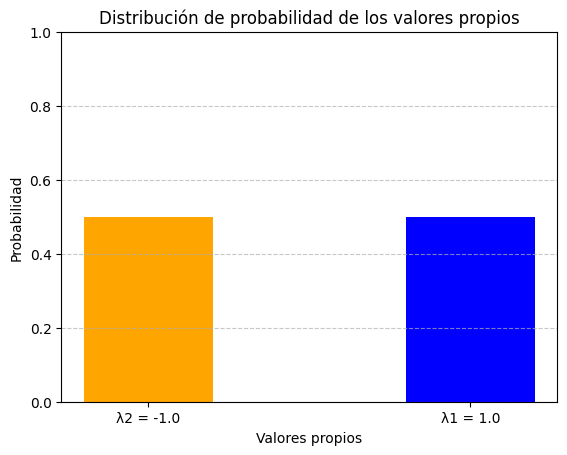

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

e1 = np.array([1, 0], dtype=complex)  
e2 = np.array([0, 1], dtype=complex) 
psi = np.array([1/np.sqrt(2), 1/np.sqrt(2)], dtype=complex) 

lambda1 = 1.0
lambda2 = -1.0

p1 = np.abs(np.vdot(e1, psi))**2  
p2 = np.abs(np.vdot(e2, psi))**2 


mean_value = p1 * lambda1 + p2 * lambda2


print(f"Probabilidad de transición a |e1⟩: {p1:.2f}")
print(f"Probabilidad de transición a |e2⟩: {p2:.2f}")
print(f"Valor medio de la distribución: {mean_value:.2f}")

eigenvalues = [lambda1, lambda2]
probabilities = [p1, p2]

plt.bar(eigenvalues, probabilities, color=['blue', 'orange'])
plt.xticks(eigenvalues, [f'λ1 = {lambda1}', f'λ2 = {lambda2}'])
plt.xlabel('Valores propios')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad de los valores propios')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---


4.4.2 Regresa al Ejemplo 3.3.2 (billar cuántico), mantén el mismo  
vector de estado inicial \([1, 0, 0, 0]^T\), pero cambia la transformación unitaria a  

\[
U =
\begin{bmatrix}
0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
\frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}} \\
0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0
\end{bmatrix}
\]

Determina el estado del sistema después de tres pasos de tiempo.  
¿Cuál es la probabilidad de encontrar la bola cuántica en la posición 3?


## 🔹 Pasos de la solución  

1. **Definir la matriz unitaria $U$**  
   - Se establece una matriz $4 \times 4$ con entradas complejas.  
   - $U$ representa la evolución del sistema en un solo paso.  

2. **Definir el estado inicial**  
   - Se inicia con el estado base $|\psi_0\rangle = [1, 0, 0, 0]^T$, indicando que la partícula está en la primera posición.  

3. **Aplicar la matriz $U$ tres veces**  
   - Se usa la propiedad de potencias de matrices:  
     $$ |\psi_3\rangle = U^3 |\psi_0\rangle $$  
   - Esto simula la evolución del sistema tras **tres iteraciones**.  

4. **Calcular la probabilidad en la posición 3**  
   - En la representación de Python, la **posición 3** corresponde al índice **2**.  
   - La probabilidad de encontrar la partícula en esta posición es:  
     $$ P(3) = |\psi_3[2]|^2 $$  

5. **Visualizar los resultados**  
   - Se imprime el estado final después de **tres pasos**.  
   - Se muestra la probabilidad de encontrar la partícula en la **posición 3**.

In [34]:
import numpy as np


U = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])


initial_state = np.array([1, 0, 0, 0], dtype=complex)

state_after_3_steps = np.linalg.matrix_power(U, 3) @ initial_state

probability_position_3 = np.abs(state_after_3_steps[2])**2

print("Estado después de 3 pasos:")
print(state_after_3_steps)
print("\nProbabilidad de encontrar la bola en la posición 3:")
print(probability_position_3)

Estado después de 3 pasos:
[ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]

Probabilidad de encontrar la bola en la posición 3:
0.0


## Discusion ejercico 4.5.2 y 4.5.3
# ejercico 4.5.2
Este ejercicio introduce el concepto de entrelazamiento cuántico en sistemas de partículas con espín. Se pide escribir el vector de estado general para un sistema de dos partículas y luego generalizarlo a 
𝑛
n partículas.

El ejercicio destaca que, aunque los estados básicos de un sistema compuesto se pueden expresar como productos tensoriales de los estados de sus subsistemas, esto no siempre es posible para cualquier estado cuántico. Algunos estados, como los entrelazados, no pueden descomponerse en productos de estados individuales. Esto demuestra la importancia del entrelazamiento en la computación cuántica y en la representación de información cuántica.

# ejercico 4.5.2
Este ejercicio analiza un caso específico de entrelazamiento utilizando el estado:
Se plantea la pregunta de si este estado es separable. Para responder, se debe verificar si es posible escribirlo como el producto tensorial de dos estados individuales. Como el estado tiene términos cruzados y no puede factorizarse en dos componentes independientes, se concluye que el estado es entrelazado.

Esto refuerza la idea de que algunos sistemas cuánticos no pueden describirse simplemente como combinaciones de estados individuales, lo que tiene implicaciones fundamentales en áreas como la computación cuántica y la teoría de la información cuántica.